In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

In [2]:
data = pd.read_csv("churn.csv")
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data['Churn'].value_counts()

No     5174
Yes    1872
Name: Churn, dtype: int64

In [4]:
data.shape

(7046, 12)

### EDA 

In [5]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


We don't need customerID column for analyzing, so we can drop this column.

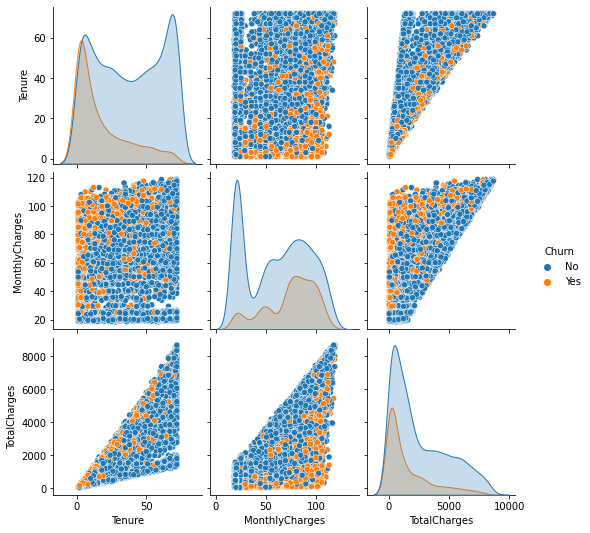

In [6]:
sns.pairplot(data,vars = ['Tenure','MonthlyCharges','TotalCharges'], hue="Churn")
plt.show()

People having lower tenure and higher monthly charges are tend to churn more. Also as you can see below; having month-to-month contract on churn probability.

# A. Data Preparation
1. Duplicated Handling
2. Missing Value Handling
3. Outliers Analysis Handling
4. Encoding


### 1. Duplicated Handling

In [7]:
#Checking duplicated data
data[data.duplicated(keep=False)]

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
858,4795-UXVCJ,Male,0.0,No,No,26.0,One year,No,Credit card (automatic),19.80,457.30,No
2350,5067-WJEUN,NaN,0.0,Yes,Yes,67.0,Two year,Yes,Bank transfer (automatic),54.20,3838.20,No
3314,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.90,Yes
3393,8434-PNQZX,Female,0.0,No,No,42.0,Two year,Yes,Credit card (automatic),78.45,3373.40,No
3478,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No
3652,3604-WLABM,Female,0.0,No,No,10.0,Month-to-month,No,Electronic check,54.25,583.00,No
3843,6418-HNFED,Male,0.0,Yes,No,51.0,Two year,Yes,Credit card (automatic),83.25,4089.45,No
4457,3606-SBKRY,Male,0.0,No,No,31.0,One year,Yes,Electronic check,50.05,1523.40,No
4875,5233-GEEAX,Male,1.0,No,No,8.0,Month-to-month,Yes,Electronic check,29.40,221.90,Yes
5835,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No


In [ ]:
print('Before Drop Duplicated Data')
data.shape

Before Drop Duplicated Data


(7046, 12)

In [ ]:
data = data.drop_duplicates(keep='first')

In [ ]:
print("After drop duplicated data")
data.shape

After drop duplicated data


(7032, 12)

In [ ]:
#Checking again for duplicated data
data[data.duplicated(keep=False)]

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### 2. Missing Value Handling

In [ ]:
#Missing Value checking
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7023 non-null   object 
 1   Gender            7017 non-null   object 
 2   SeniorCitizen     7020 non-null   float64
 3   Partner           7016 non-null   object 
 4   Dependents        7013 non-null   object 
 5   Tenure            7015 non-null   float64
 6   Contract          7019 non-null   object 
 7   PaperlessBilling  7019 non-null   object 
 8   PaymentMethod     7021 non-null   object 
 9   MonthlyCharges    7022 non-null   float64
 10  TotalCharges      7032 non-null   float64
 11  Churn             7032 non-null   object 
dtypes: float64(4), object(8)
memory usage: 714.2+ KB


In [ ]:
#missing value
data.isna().sum()

customerID           9
Gender              15
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= customerID =================


7590-VHVEG    1
0594-UFTUL    1
5760-FXFVO    1
1928-BXYIV    1
2956-GGUCQ    1
             ..
0020-INWCK    1
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
3186-AJIEK    1
Name: customerID, Length: 7023, dtype: int64


============= Gender =================


Male      3545
Female    3472
Name: Gender, dtype: int64


============= SeniorCitizen =================


0.0    5881
1.0    1139
Name: SeniorCitizen, dtype: int64


============= Partner =================


No     3630
Yes    3386
Name: Partner, dtype: int64


============= Dependents =================


No     4919
Yes    2094
Name: Dependents, dtype: int64


============= Tenure =================


1.0     613
72.0    361
2.0     235
3.0     200
4.0     176
       ... 
38.0     59
28.0     57
39.0     56
44.0     51
36.0     49
Name: Tenure, Length: 72, dtype: int64


============= Contract =================


Month-to-month    3866
Two year          1684
One year          1469
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4159
No     2860
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2361
Mailed check                 1602
Bank transfer (automatic)    1539
Credit card (automatic)      1519
Name: PaymentMethod, dtype: int64


============= MonthlyCharges =================


20.05     61
19.95     44
19.90     44
19.85     44
19.65     43
          ..
92.10      1
23.65      1
114.70     1
43.65      1
78.70      1
Name: MonthlyCharges, Length: 1583, dtype: int64


============= TotalCharges =================


20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64


============= Churn =================


No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
data.drop(["customerID"],axis=1,inplace = True)

In [ ]:
#percentage missing value
data.isna().sum()*100/len(data)

Gender              0.213311
SeniorCitizen       0.170648
Partner             0.227531
Dependents          0.270193
Tenure              0.241752
Contract            0.184869
PaperlessBilling    0.184869
PaymentMethod       0.156428
MonthlyCharges      0.142207
TotalCharges        0.000000
Churn               0.000000
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data,test_size=0.2, random_state=0)

### train missing value checking

In [ ]:
train.isna().sum() #nan checking missing value

Gender              12
SeniorCitizen        8
Partner             12
Dependents          17
Tenure              13
Contract            11
PaperlessBilling    11
PaymentMethod       10
MonthlyCharges       9
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
train.dtypes

Gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
Tenure              float64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
### Numerical
median_seniorcitizen = train[~train['SeniorCitizen'].isna()]['SeniorCitizen'].median()
median_tenure = train[~train['Tenure'].isna()]['Tenure'].median()
median_mon = train[~train['MonthlyCharges'].isna()]['MonthlyCharges'].median()

In [ ]:
train['SeniorCitizen'] = train['SeniorCitizen'].fillna(median_seniorcitizen)
train['Tenure'] = train['Tenure'].fillna(median_tenure)
train['MonthlyCharges'] = train['MonthlyCharges'].fillna(median_mon)

In [ ]:
### Categorical
mode_g = train[~train['Gender'].isna()]['Gender'].mode()[0]
mode_p = train[~train['Partner'].isna()]['Partner'].mode()[0]
mode_d = train[~train['Dependents'].isna()]['Dependents'].mode()[0]
mode_c = train[~train['Contract'].isna()]['Contract'].mode()[0]
mode_pb = train[~train['PaperlessBilling'].isna()]['PaperlessBilling'].mode()[0]
mode_pm = train[~train['PaymentMethod'].isna()]['PaymentMethod'].mode()[0]

In [ ]:
train['Gender'] = train['Gender'].fillna(mode_g)
train['Partner'] = train['Partner'].fillna(mode_p)
train['Dependents'] = train['Dependents'].fillna(mode_d)
train['Contract'] = train['Contract'].fillna(mode_c)
train['PaperlessBilling'] = train['PaperlessBilling'].fillna(mode_pb)
train['PaymentMethod'] = train['PaymentMethod'].fillna(mode_pm)

In [ ]:
train.isna().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### test missing value checking

In [ ]:
#numerical
test['SeniorCitizen'] = test['SeniorCitizen'].fillna(median_seniorcitizen)
test['Tenure'] = test['Tenure'].fillna(median_tenure)
test['MonthlyCharges'] = test['MonthlyCharges'].fillna(median_mon)

In [ ]:
#categorical
test['Gender'] = test['Gender'].fillna(mode_g)
test['Partner'] = test['Partner'].fillna(mode_p)
test['Dependents'] = test['Dependents'].fillna(mode_d)
test['Contract'] = test['Contract'].fillna(mode_c)
test['PaperlessBilling'] = test['PaperlessBilling'].fillna(mode_pb)
test['PaymentMethod'] = test['PaymentMethod'].fillna(mode_pm)

In [ ]:
test.isna().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3. Outlier Handling 
#### train data

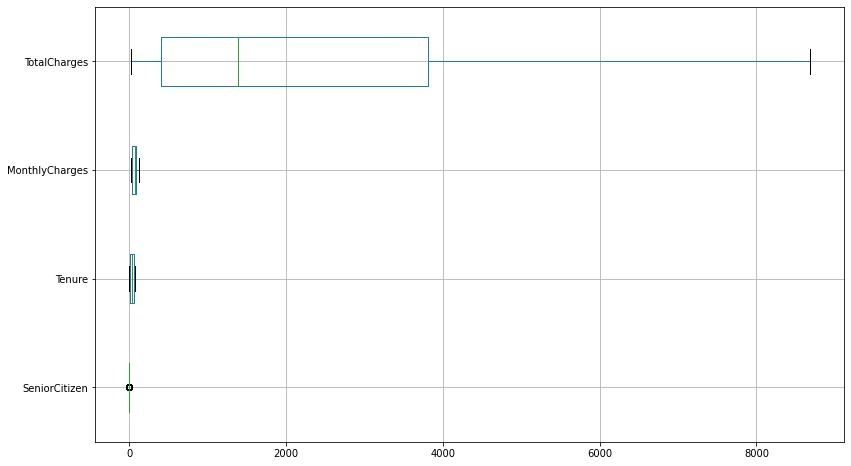

In [ ]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

### test data

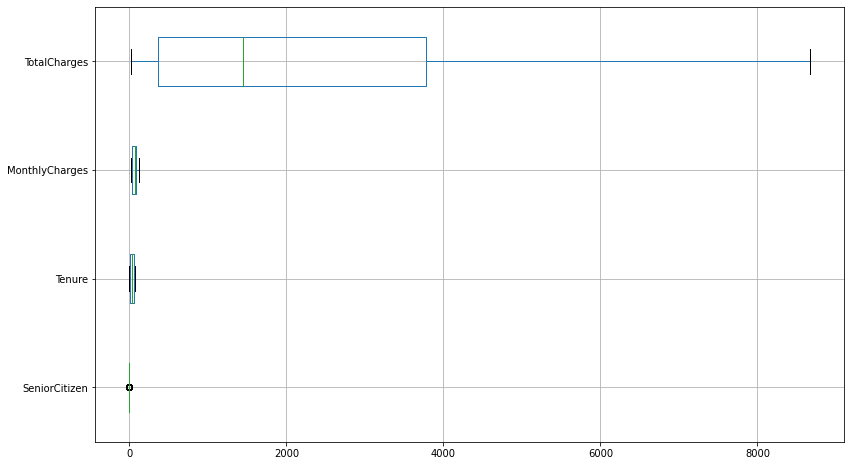

In [ ]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
test.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [ ]:
df = pd.concat([train,test], axis=0).reset_index(drop=True)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0.0,Yes,No,24.0,One year,Yes,Electronic check,58.35,1346.90,No
1,Female,0.0,Yes,Yes,71.0,Two year,No,Credit card (automatic),113.65,8166.80,No
2,Male,0.0,Yes,Yes,70.0,Two year,No,Mailed check,25.35,1715.15,No
3,Female,0.0,No,Yes,49.0,One year,No,Credit card (automatic),19.45,921.30,No
4,Female,0.0,No,No,22.0,Month-to-month,Yes,Bank transfer (automatic),84.15,1821.95,No


In [ ]:
df.isna().sum()
#zero missing value

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Encoding

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Gender =================


Male      3560
Female    3472
Name: Gender, dtype: int64


============= SeniorCitizen =================


0.0    5893
1.0    1139
Name: SeniorCitizen, dtype: int64


============= Partner =================


No     3646
Yes    3386
Name: Partner, dtype: int64


============= Dependents =================


No     4938
Yes    2094
Name: Dependents, dtype: int64


============= Tenure =================


1.0     613
72.0    361
2.0     235
3.0     200
4.0     176
       ... 
38.0     59
28.0     57
39.0     56
44.0     51
36.0     49
Name: Tenure, Length: 72, dtype: int64


============= Contract =================


Month-to-month    3879
Two year          1684
One year          1469
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4172
No     2860
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2372
Mailed check                 1602
Bank transfer (automatic)    1539
Credit card (automatic)      1519
Name: PaymentMethod, dtype: int64


============= MonthlyCharges =================


20.05     61
19.95     44
19.85     44
19.90     44
19.65     43
          ..
63.10      1
113.00     1
112.25     1
53.70      1
43.35      1
Name: MonthlyCharges, Length: 1583, dtype: int64


============= TotalCharges =================


20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
1057.55     1
820.50      1
2586.00     1
104.20      1
371.40      1
Name: TotalCharges, Length: 6530, dtype: int64


============= Churn =================


No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#Encoding Change Categorical for Binary
df.Gender = [1 if each == "Male" else 0 for each in df.Gender]

columns_to_convert = [ 'Partner','Dependents', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[item]]
    
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0.0,1,0,24.0,One year,1,Electronic check,58.35,1346.90,0
1,0,0.0,1,1,71.0,Two year,0,Credit card (automatic),113.65,8166.80,0
2,1,0.0,1,1,70.0,Two year,0,Mailed check,25.35,1715.15,0
3,0,0.0,0,1,49.0,One year,0,Credit card (automatic),19.45,921.30,0
4,0,0.0,0,0,22.0,Month-to-month,1,Bank transfer (automatic),84.15,1821.95,0


In [ ]:
# One Hot Encoding using Pandas get dummies
df = pd.get_dummies(data=df)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0.0,1,0,24.0,1,58.35,1346.90,0,0,1,0,0,0,1,0
1,0,0.0,1,1,71.0,0,113.65,8166.80,0,0,0,1,0,1,0,0
2,1,0.0,1,1,70.0,0,25.35,1715.15,0,0,0,1,0,0,0,1
3,0,0.0,0,1,49.0,0,19.45,921.30,0,0,1,0,0,1,0,0
4,0,0.0,0,0,22.0,1,84.15,1821.95,0,1,0,0,1,0,0,0


In [ ]:
list(df.columns)

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [ ]:
df = df[['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn']]

In [ ]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0.0,1,0,24.0,1,58.35,1346.90,0,1,0,0,0,1,0,0
1,0,0.0,1,1,71.0,0,113.65,8166.80,0,0,1,0,1,0,0,0
2,1,0.0,1,1,70.0,0,25.35,1715.15,0,0,1,0,0,0,1,0
3,0,0.0,0,1,49.0,0,19.45,921.30,0,1,0,0,1,0,0,0
4,0,0.0,0,0,22.0,1,84.15,1821.95,1,0,0,1,0,0,0,0


### Calculate VIF for Checking Multicolinearity -> Feature Selection

In [ ]:
# define feature and target
feature_x = df.drop(columns = 'Churn')
target_Y = df[['Churn']]

In [ ]:
# Calculate VIF score for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_x)

vif_df = pd.DataFrame([vif(X.values, i)
            for i in range(X.shape[1])],
            index = X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,Gender,1.001124
2,SeniorCitizen,1.131723
3,Partner,1.457353
4,Dependents,1.373842
5,Tenure,7.333480
6,PaperlessBilling,1.190049
7,MonthlyCharges,3.940242
8,TotalCharges,9.750099
9,Contract_Month-to-month,inf
10,Contract_One year,inf


There are multicolinearitas when VIF >= 4 :
1. Tenure
2. TotalCharges
- > let's drop the column

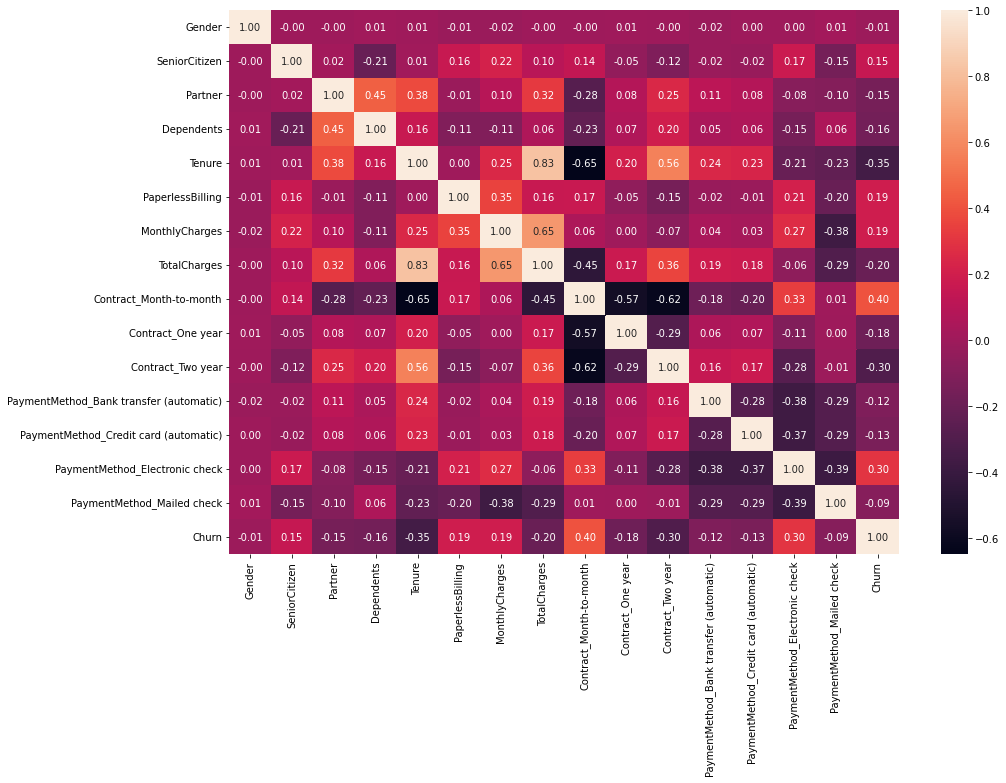

In [ ]:
# heatmap correlation

data_df = pd.concat([feature_x, target_Y], axis=1)
corr = data_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


In [ ]:
### Drop Multikolinearitas Features
df = df.drop(columns = ['Tenure','TotalCharges'])
df

,Gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0.0,1,0,1,58.35,0,1,0,0,0,1,0,0
1,0,0.0,1,1,0,113.65,0,0,1,0,1,0,0,0
2,1,0.0,1,1,0,25.35,0,0,1,0,0,0,1,0
3,0,0.0,0,1,0,19.45,0,1,0,0,1,0,0,0
4,0,0.0,0,0,1,84.15,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0.0,1,1,0,84.45,0,1,0,1,0,0,0,0
7028,1,1.0,1,1,1,105.10,1,0,0,0,1,0,0,1
7029,1,0.0,0,0,1,69.75,1,0,0,0,0,1,0,1
7030,0,0.0,1,0,1,115.00,0,1,0,0,0,1,0,0


### Copy Data

In [ ]:
data_telco = df.copy()

In [ ]:
data = df.copy()

In [ ]:
data.dtypes

Gender                                       int64
SeniorCitizen                              float64
Partner                                      int64
Dependents                                   int64
PaperlessBilling                             int64
MonthlyCharges                             float64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year                            uint8
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check                   uint8
Churn                                        int64
dtype: object

In [ ]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0.0,1,0,1,58.35,0,1,0,0,0,1,0,0
1,0,0.0,1,1,0,113.65,0,0,1,0,1,0,0,0
2,1,0.0,1,1,0,25.35,0,0,1,0,0,0,1,0
3,0,0.0,0,1,0,19.45,0,1,0,0,1,0,0,0
4,0,0.0,0,0,1,84.15,1,0,0,1,0,0,0,0


In [ ]:
X = data.drop(['Churn'],axis=1)

In [ ]:
y = data.Churn.values

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

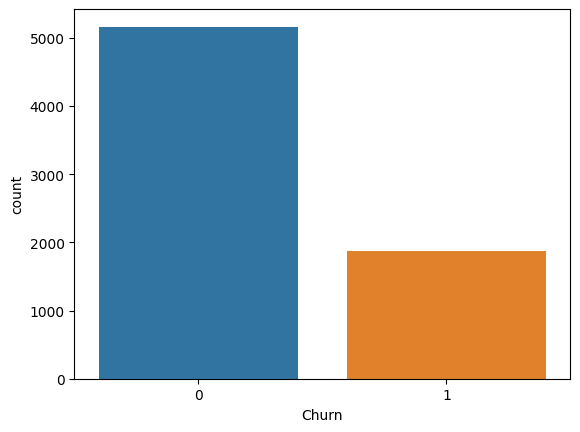

In [ ]:
sns.countplot(x="Churn",data=data)
plt.show()



### Prepare x and y

First, seperate x and y values. y would be our class which is Churn column in this dataset. x would be the remaing columns. Also, apply normalization to x in order to scale all values between 0 and 1.


In [ ]:
#assign Class_att column as y attribute
y = data.Churn.values

#drop Class_att column, remain only numerical columns
new_data = data.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


ValueError: ignored



### Splitting Data

Split the data set as train and test with 20:80 ratio.


### Undersampling

In [ ]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =0)

In [ ]:
x_train.shape , y_train.shape

((5625, 13), (5625,))

In [ ]:
# let's separate into validation and testing set with all target, (val using for Hyperparameter tunning with val = 50% from data test)

x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=0)
x_test.shape, y_test.shape

((703, 13), (703,))

### Handling Imbalance Data with Undersampling : churn keep in real data

In [ ]:
from imblearn import under_sampling, over_sampling

#X = df_numeric.drop(['survived'],axis=1)
#y = df_numeric['survived']

# Undersampling -> USE IT
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x_train, y_train)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(x_train, y_train)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(x_train, y_train)


### Apply Machine Learning Algorithms

Let's start to apply some machine learning algorithms and find the accuracy of each.
x_train , y_train change to X_under, y_under in .fit()
#### 1. KNN Classification




We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. So that we can find the optimal K value.


In [ ]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(X_under, y_under)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.6685633001422475


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

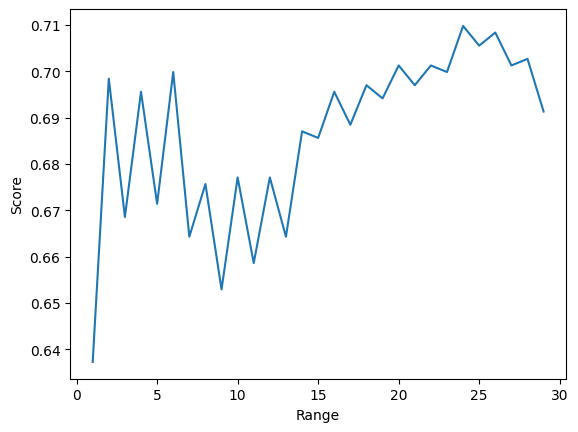

In [ ]:
score_array = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_under, y_under)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,30),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see above, if we use K = 1, then we get maximum score of 86%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 25) #set K neighbor as max score above
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=25 is :",accuracy_knn)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy according to K=25 is : 0.7709815078236131


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### 2. SVM(Support Vector Machine) Classification

In [ ]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_under, y_under)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.6799431009957326


#### 3. Logistic Regression Classification

In [ ]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_under, y_under)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7126600284495022


#### 4. Decision Tree Classification

In [ ]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_under, y_under)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.6173541963015647


#### 5. Random Forest Classification


In [ ]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 0)
rf_model_initial.fit(X_under, y_under)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.6486486486486487




I set tree number as 5 initially. But I want to find the appropriate tree number. Let's try to find the best number with trying 1 to 50.


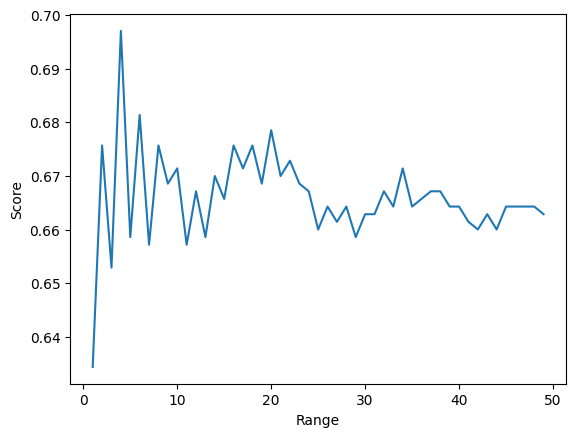

In [ ]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(X_under, y_under)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 4, random_state = 1) #set tree number as max score above
rf_model.fit(X_under, y_under)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 4 trees is :",accuracy_rf)

Random Forest accuracy for 4 trees is : 0.6970128022759602


#### 6.Naive Bayes Classification

In [ ]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_under, y_under)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.6884779516358464




Logistic regression and SVC classificagtion algorithms have the highest accuracy. But as I mentioned before, our *data is imbalanced*. So it is important to look at the confusion matrix according to these two algorithms. With imbalanced datasets, the highest accuracy does not give the best model. Assume we have 1000 total rows, 10 rows are churn and 990 rows are non-churn. If we find all these 10 churn rows as non-churn, then the accuracy will be still %99. Althogh it is a wrong model, if we do not look at the confusion matrix, then we can not see the mistake.

Confusion matrix gives us FN(false negative), FP(false positive), TN(true negative) and TP(true positive) values.
missing

![image.png](attachment:image.png)


### Model Evaluation

In [ ]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

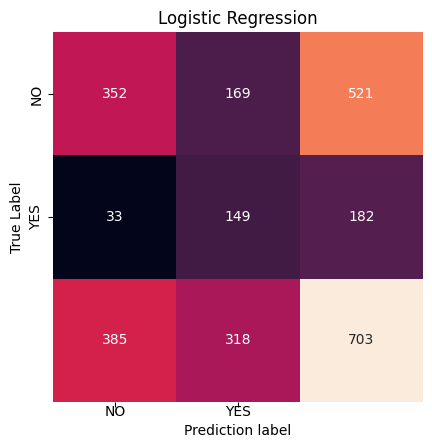

In [ ]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

TN = 352
FP = 169
FN = 33
TP = 149
This means; there are total 352+169 = 521 actual non-churn values (masih setia berlangganan) and the algorithm predict 352 of them as non-churn and actual is non churn then 169 of them churn but actual is no churn. Also there are total 149 + 33 = 182 actual churn values and the algorithm predict 149 of them as churn and 33 of them as non - churn but churn.

Acuuracy should not be used as solely metric for imbalance datasets. There are some other metrics named as recall and precision.
![image.png](attachment:image.png)

1. Recall untuk kasus churn itu bahaya karena kita prediksi berkaitan dengan FN (prediksi negatif churn atau masih setia tapi faktanya churn) maka dari FN harus kecil supaya Recall nya bernilai besar
2. Presisi untuk kasus churn ini gapapa, karena berkaitan dengan FP (prediksi churn tapi dia masih setia) maka dari itu FP harus kecil supaya Presisi bernilai besar

![image-2.png](attachment:image-2.png)


![image-3.png](attachment:image-3.png)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


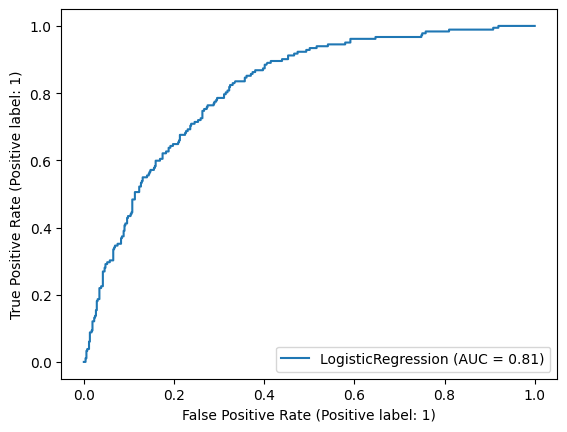

In [ ]:
plot_roc_curve(lr_model,x_test,y_test)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


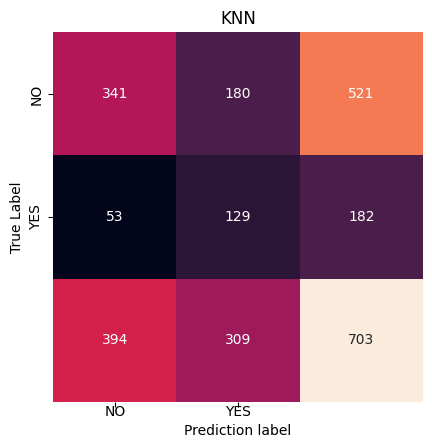

In [ ]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


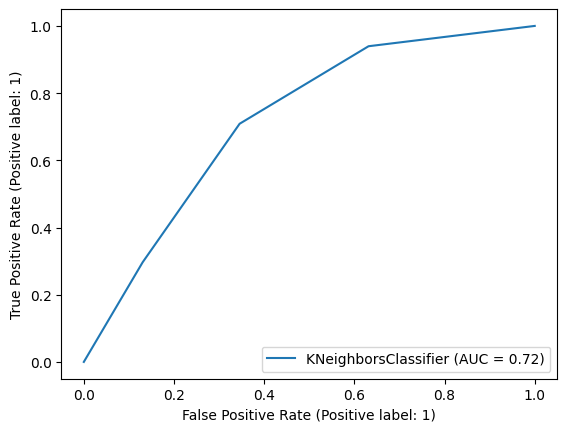

In [ ]:
plot_roc_curve(knn,x_test,y_test)
plt.show()

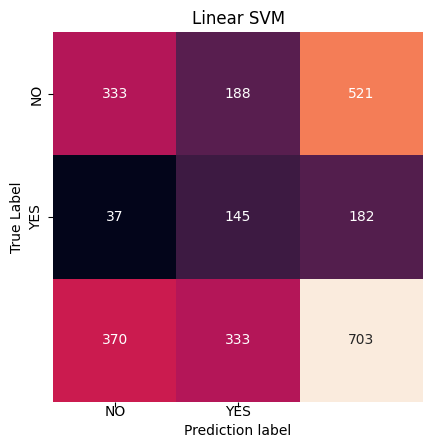

In [ ]:
model_evaluation(svc_model.predict(x_test),"Linear SVM")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


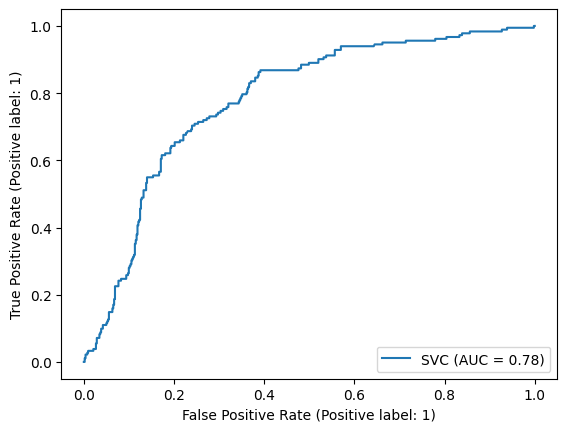

In [ ]:
plot_roc_curve(svc_model,x_test,y_test)
plt.show()

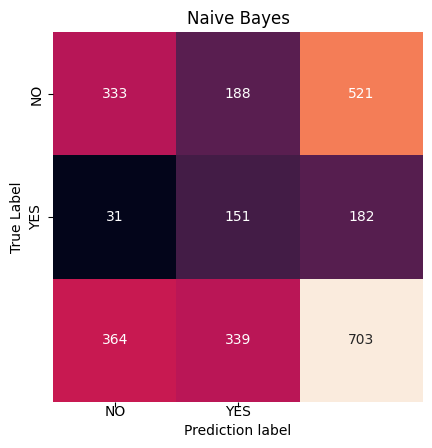

In [ ]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


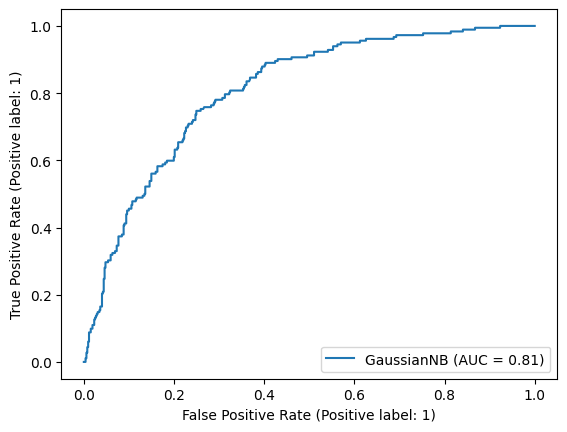

In [ ]:
plot_roc_curve(nb_model,x_test,y_test)
plt.show()

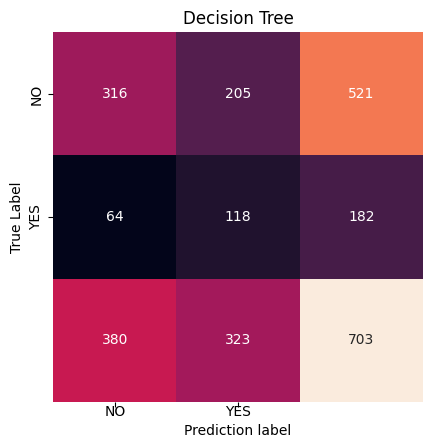

In [ ]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


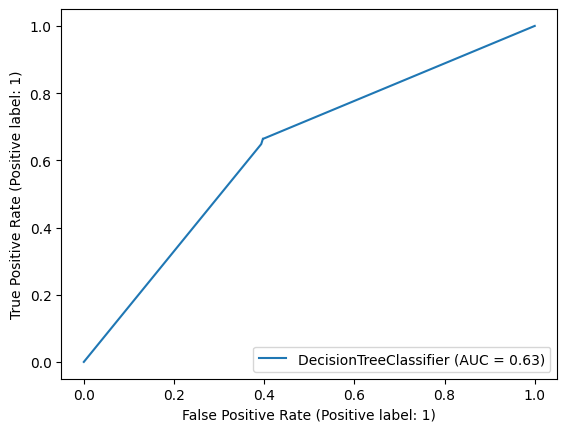

In [ ]:
plot_roc_curve(dt_model,x_test,y_test)
plt.show()

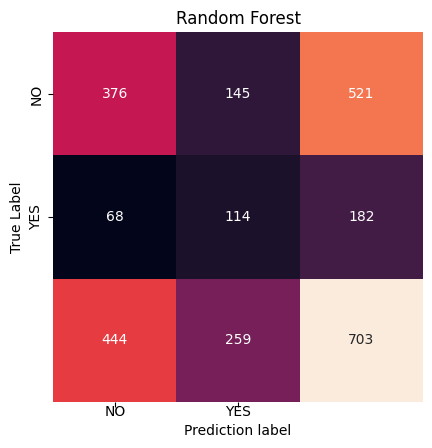

In [ ]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


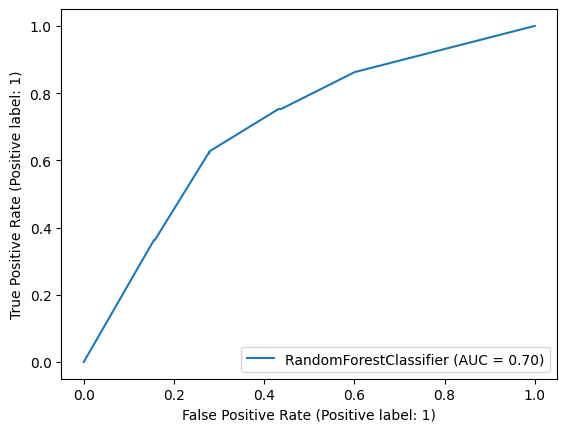

In [ ]:
plot_roc_curve(rf_model,x_test,y_test)
plt.show()

### Evaluasi Model

In [ ]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

### Appropirate metric for fitting the model using Recall in Churn Case

In [ ]:
print('============ EVALUATE MODEL ON TEST DATA ============')
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========SVC=========;",y_test, svc_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

============ EVALUATE MODEL ON TEST DATA ============
========Logistic Regression=========;
accuracy:  0.7126600284495022
precision:  0.46855345911949686
recall:  0.8186813186813187
f1_score:  0.7301719090997585
=========SVC=========;
accuracy:  0.6799431009957326
precision:  0.43543543543543545
recall:  0.7967032967032966
f1_score:  0.6997436420022011
=========Naive Bayes=========;
accuracy:  0.6884779516358464
precision:  0.44542772861356933
recall:  0.8296703296703297
f1_score:  0.707783353047641
=========Decision Tree=========;
accuracy:  0.6173541963015647
precision:  0.3653250773993808
recall:  0.6483516483516484
f1_score:  0.6408324120302994
=========Random Forest=========;
accuracy:  0.6970128022759602
precision:  0.44015444015444016
recall:  0.6263736263736264
f1_score:  0.711375975297437
=========KNN=========;
accuracy:  0.6685633001422475
precision:  0.4174757281553398
recall:  0.7087912087912088
f1_score:  0.6884259685160806


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Hyperparameter tunning 
untuk hasil model yang best pada Recall -> pada Naive Bayes
Referensi : 
1. https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
2. https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV #TUnning pakai GridSearchCV

parameters = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

gridsearch_result = GridSearchCV(nb_model,
                              parameters, 
                              cv=3,
                              scoring='recall')
gridsearch_result.fit(x_val, y_val)
gridsearch_result.best_params_

{'var_smoothing': 0.00607832312829723}

In [ ]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model_tunning = GaussianNB(var_smoothing = 0.00607832312829723)
nb_model_tunning.fit(X_under, y_under)
accuracy_nb = nb_model_tunning.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.6884779516358464


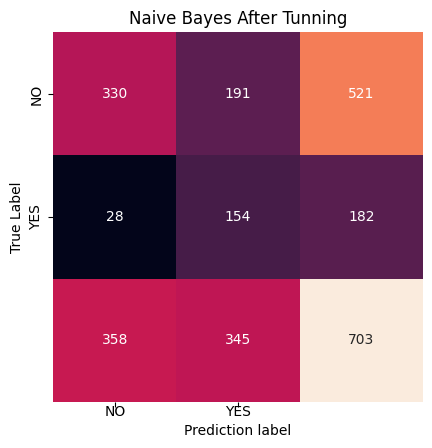

In [ ]:
model_evaluation(nb_model_tunning.predict(x_test),"Naive Bayes After Tunning")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


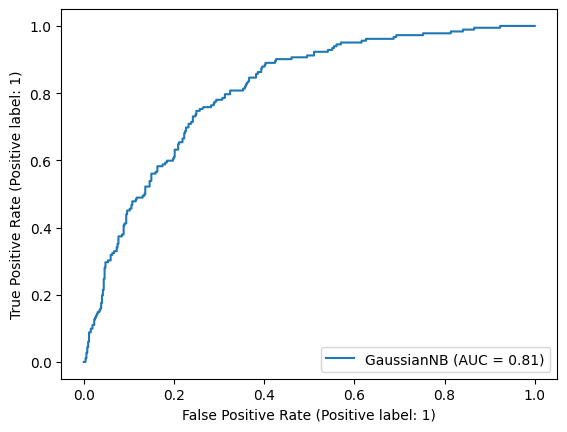

In [ ]:
plot_roc_curve(nb_model_tunning,x_test,y_test)
plt.show()

In [ ]:
print_scores("=========Naive Bayes AFTER TUNNING=========;",y_test, nb_model_tunning.predict(x_test))

=========Naive Bayes AFTER TUNNING=========;
accuracy:  0.6884779516358464
precision:  0.4463768115942029
recall:  0.8461538461538461
f1_score:  0.7077704988496045


### Terjadi peningkatan setelah tunning pada recall sebesar 2% dari model awal